### 1. Go to https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 and download the data 

### 2. Use command line to rename the downloaded file to suicide_rates.csv, then move the file to your repository 

### 3. Load the data into a pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_suicide = pd.read_csv('suicides.csv')
df_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### 4. Pick only rows where country starts with 'U' 

`use apply and lambda`

In [5]:
df_suicide_subset = df_suicide[df_suicide.country.apply(lambda x: x.startswith('U'))]

In [7]:
df_suicide_subset.country.value_counts()

United Kingdom          372
United States           372
Uruguay                 336
Ukraine                 336
Uzbekistan              264
United Arab Emirates     72
Name: country, dtype: int64

### 5. Get the names of unique countries left - `use .unique()`

##### [Thoughts]: how would that be useful if we have duplicated values in a dataset? 

In [8]:
df_suicide_subset.country.unique()

array(['Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan'], dtype=object)

### 6. Pick only rows with 'United States' (without using apply or lambda - try using indexing)

In [25]:
df_US = df_suicide_subset[df_suicide_subset.country == 'United States']

### 6. Group by age column and sum # suicides

In [26]:
df_US.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


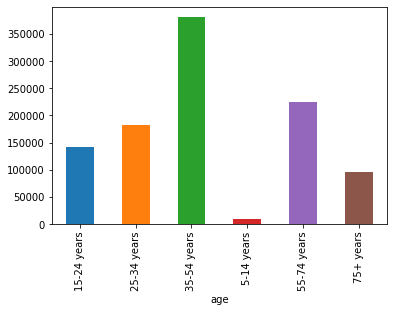

In [27]:
df_US.groupby('age').suicides_no.sum().plot.bar()  # double the age amount in 35 to 54 yrs 

### 7. Change the age column to a categorical one 
`use astype`



In [28]:
df_US['age'] = df_US.age.astype('category')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_US.dtypes

country                 object
year                     int64
sex                     object
age                   category
suicides_no              int64
population               int64
suicides/100k pop      float64
country-year            object
HDI for year           float64
 gdp_for_year ($)       object
gdp_per_capita ($)       int64
generation              object
dtype: object

### 8. Re-order the categories so that 5-14 years appears first 

`use cat.reorder_categories`

In [32]:
df_US.age.cat.reorder_categories(['5-14 years','15-24 years', '25-34 years','35-54 years','55-74 years','75+ years'], inplace = True)

 Draw a barplot of # suicides(y) per age-group (x) for 2015

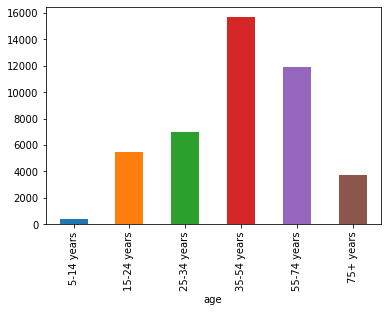

In [35]:
df_US[df_US.year == 2015].groupby('age')['suicides_no'].sum().plot.bar()

In [40]:
grouped_df = df_US[df_US.year == 2015].groupby('age')['suicides_no'].sum().reset_index()

In [41]:
grouped_df

,age,suicides_no
0,5-14 years,413
1,15-24 years,5491
2,25-34 years,6947
3,35-54 years,15687
4,55-74 years,11940
5,75+ years,3711


<BarContainer object of 6 artists>

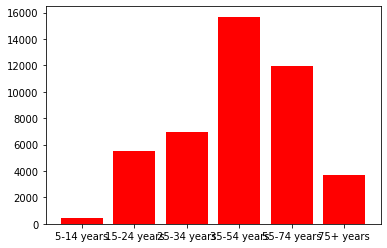

In [45]:
plt.bar(x = grouped_df.age, height = grouped_df.suicides_no, color = 'red')

### 10. Save the plot to the visualization folder we have created

### 11. Push all to your git branch.

In [46]:
plt.savefig('us_suicide_no_by_age_group_2015.png')

<Figure size 432x288 with 0 Axes>